In [1]:
import os
import cv2
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import gc
from tqdm import tqdm
import skimage


def create_dir(path):
    if os.path.isdir(path)==False:
        os.makedirs(path)


In [2]:

#CONFIGURE 

# Set Data Paths

# test images directory
# test_path='test_satellite/'

# directory with model prediction probabilities files
# test_preds_dir = 'test_preds/'

# directory where test predicted masks will be written
# test_predmask_path='test_kelp/'

# create_dir(test_preds_dir)
# create_dir(test_predmask_path)


from config import test_path, test_preds_dir, test_predmask_path

In [3]:
test_path, test_preds_dir, test_predmask_path

('test_satellite/', 'test_preds/', 'test_kelp/')

In [4]:
test_image_names=os.listdir(test_path)
# test_image_names=np.load('/kaggle/input/needkelp/kafe_test_image_names.npz')['arr_0']
full_test_img_paths=np.array([test_path+x for x in test_image_names])
# len(full_train_img_paths),len(full_train_msk_paths),full_train_img_paths[:2]
len(full_test_img_paths),full_test_img_paths[:2]


In [6]:
# Load Altitude data to memory
# test_image_names=os.listdir(test_path)
# full_test_img_paths= np.array([test_path+x for x in test_image_names])
testALT=[]
for p in tqdm(full_test_img_paths):
    img=tifffile.imread(p)[...,-1]        
    testALT.append(img)

testALT=np.stack(testALT)

# np.savez('testALT', testALT.astype('int32'))

# testALT=np.load('testALT.npz')['arr_0']

100%|██████████| 1426/1426 [01:38<00:00, 14.48it/s]


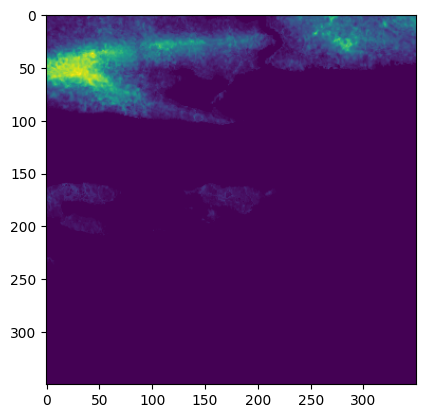

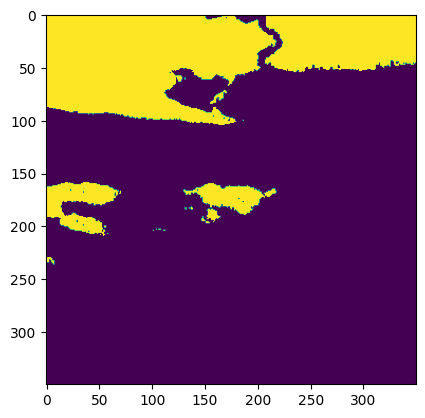

In [7]:
plt.imshow(1.*testALT[10]/testALT[10].max())
plt.show()
plt.imshow(1.*testALT[10]/testALT[10].max()>0)
plt.show()

In [1]:
# preds3=np.load(test_preds_dir+'testprobs_kk_kelp_UpperNet_512_full.npz')['arr_0']
# plt.imshow(preds3[110]>0.5)
# plt.show()
# preds3.shape

(1426, 768, 768)


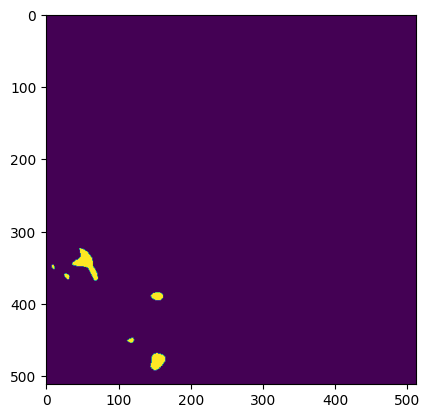

In [13]:
preds4=np.load(test_preds_dir+'v139full.npz')['arr_0'] #b1 768
print(preds4.shape)
preds4 = np.array([skimage.transform.resize(x, (512,512)) for x in preds4])
plt.imshow(preds4[110]>0.5)
plt.show()
# preds4.shape

(1426, 512, 512)


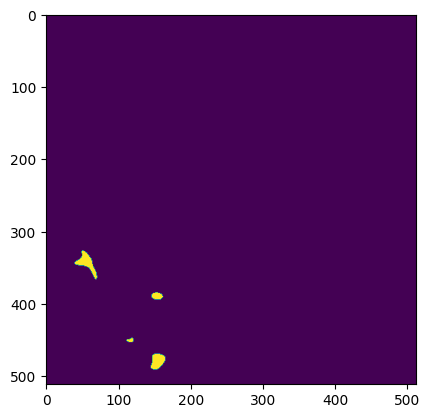

In [14]:
preds6=np.load(test_preds_dir+'v199full.npz')['arr_0'] #b4 512 !
print(preds6.shape)
# preds6 = np.array([skimage.transform.resize(x, (512,512)) for x in preds6])
plt.imshow(preds6[110]>0.5)
plt.show()
# preds6.shape

(1426, 640, 640)


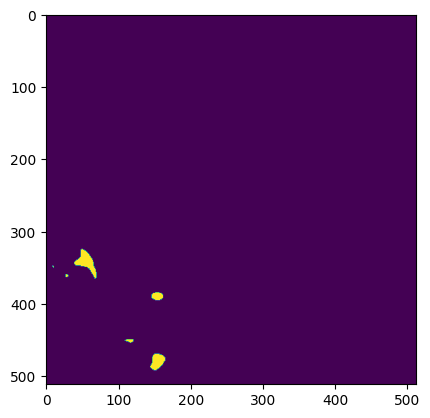

In [15]:
preds7=np.load(test_preds_dir+'v188full3.npz')['arr_0'] #b3 640
print(preds7.shape)
preds7 = np.array([skimage.transform.resize(x, (512,512)) for x in preds7])
# preds7=cubic_resize_all(preds7)
plt.imshow(preds7[110]>0.5)
plt.show()

(1426, 640, 640)


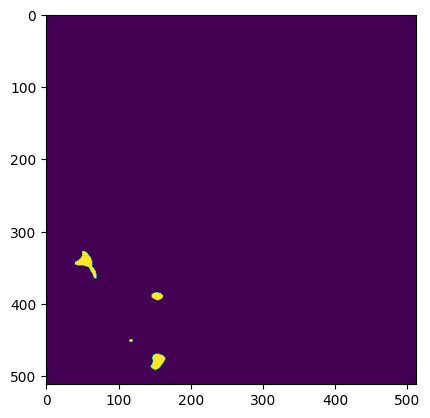

In [16]:
preds8=np.load(test_preds_dir+'v171full.npz')['arr_0'] #b2 640
print(preds8.shape)
preds8 = np.array([skimage.transform.resize(x, (512,512)) for x in preds8])
# preds8=cubic_resize_all(preds8)
plt.imshow(preds8[110]>0.5)
plt.show()

(1426, 1024, 1024)


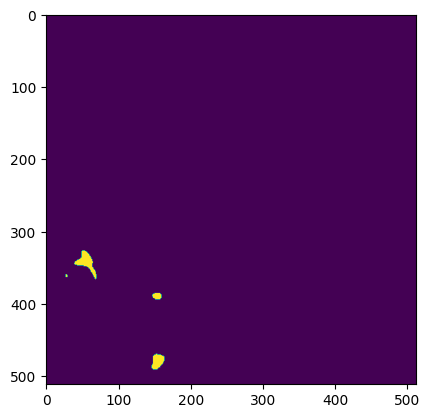

In [17]:
preds12=np.load(test_preds_dir+'GCp_v10full.npz')['arr_0'] #b1 1024
print(preds12.shape)
preds12 = np.array([skimage.transform.resize(x, (512,512)) for x in preds12])
# preds12=cubic_resize_all(preds12)
plt.imshow(preds12[110]>0.5)
plt.show()


(1426, 512, 512)


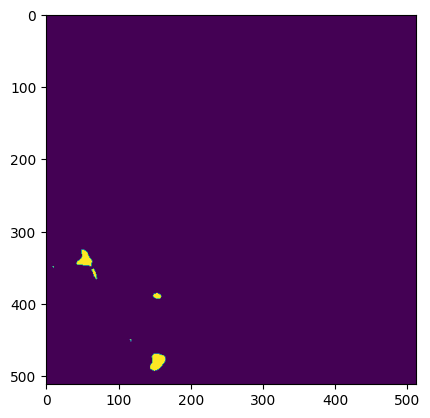

In [18]:
preds13=np.load(test_preds_dir+'v222full.npz')['arr_0'] ##convnext 512
print(preds13.shape)
# preds13 = np.array([skimage.transform.resize(x, (512,512)) for x in preds13])
# # preds13=cubic_resize_all(preds13)
plt.imshow(preds13[110]>0.5)
plt.show()


(1426, 768, 768)


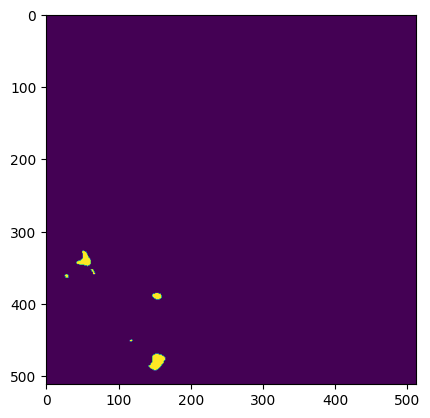

In [19]:
preds15=np.load(test_preds_dir+'v224full.npz')['arr_0'] #convnext 768
print(preds15.shape)
preds15 = np.array([skimage.transform.resize(x, (512,512)) for x in preds15])
# preds15=cubic_resize_all(preds15)
plt.imshow(preds15[110]>0.5)
plt.show()


(1426, 512, 512)


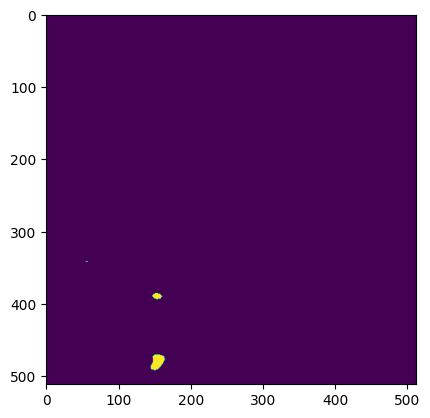

In [20]:
preds17=np.load(test_preds_dir+'v227full.npz')['arr_0'] #convnextB 512
print(preds17.shape)
# preds17 = np.array([skimage.transform.resize(x, (512,512)) for x in preds17])
# # preds17=cubic_resize_all(preds17)
plt.imshow(preds17[110]>0.5)
plt.show()

In [21]:
# preds18=np.load('testProbs/v229full.npz')['arr_0'] #convnextT 640
# print(preds18.shape)
# preds18 = np.array([skimage.transform.resize(x, (512,512)) for x in preds18])
# # preds18=cubic_resize_all(preds18)
# plt.imshow(preds18[110]>0.5)
# plt.show()

(1426, 896, 896)


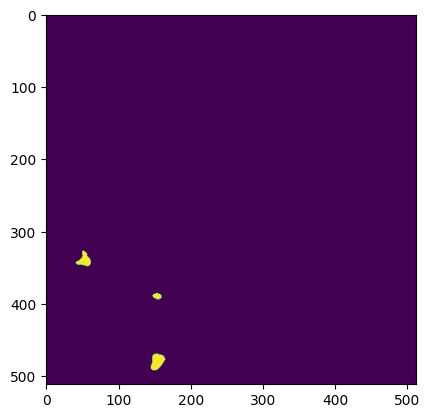

In [22]:
preds24=np.load(test_preds_dir+'GCp_v15full.npz')['arr_0'] #convnext tiny 1024
print(preds24.shape)
preds24 = np.array([skimage.transform.resize(x, (512,512)) for x in preds24])
# # preds24=cubic_resize_all(preds24)
plt.imshow(preds24[110]>0.5)
plt.show()

In [23]:
gc.collect()

6708

In [2]:
# 3,4,6,7,8,12,13,15,17,24
#sanity check
# np.corrcoef(preds3.flatten(),preds4.flatten()),
np.corrcoef(preds4.flatten(),preds6.flatten()),np.corrcoef(preds4.flatten(),preds7.flatten()),np.corrcoef(preds4.flatten(),preds8.flatten()),np.corrcoef(preds4.flatten(),preds12.flatten()),np.corrcoef(preds4.flatten(),preds13.flatten())(array([[1.        , 0.95643199],
#         [0.95643199, 1.        ]]),
#  array([[1.        , 0.96609553],
#         [0.96609553, 1.        ]]),
#  array([[1.        , 0.96869102],
#         [0.96869102, 1.        ]]),
#  array([[1.        , 0.96198575],
#         [0.96198575, 1.        ]]),
#  array([[1.        , 0.91623855],
#         [0.91623855, 1.        ]]))

In [25]:
gc.collect()

0

In [3]:
np.corrcoef(preds4.flatten(),preds15.flatten()),np.corrcoef(preds4.flatten(),preds17.flatten()),np.corrcoef(preds4.flatten(),preds24.flatten())
# (array([[1.        , 0.92562855],
#         [0.92562855, 1.        ]]),
#  array([[1.        , 0.91102078],
#         [0.91102078, 1.        ]]),
#  array([[1.        , 0.92641633],
#         [0.92641633, 1.        ]]))

In [27]:
gc.collect()

0

In [28]:
preds4.max(),preds6.max(),preds7.max(),preds8.max(),preds12.max(),preds13.max(),preds15.max(),preds17.max(),preds24.max()
# (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)

(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)

In [29]:
testALT.shape

(1426, 350, 350)

In [30]:
from scipy.signal import convolve2d
# convolving on altitude channel will lead to a smoother altiude map
testALT0=np.stack([convolve2d(x.astype('float32'), np.ones((2,2)).astype('float32'), mode='same', boundary='symm', fillvalue=0) for x in testALT])
# # convolving on altitude mask will lead to a smoother sea-land mask
# testALT00=np.stack([convolve2d(x.astype('float32'), np.ones((2,2)).astype('float32'), mode='same', boundary='symm', fillvalue=0) for x in testALT>0])


In [31]:
# plt.imshow((testALT[1]-1.*testALT0[1])/testALT0[1].max())
# plt.show()

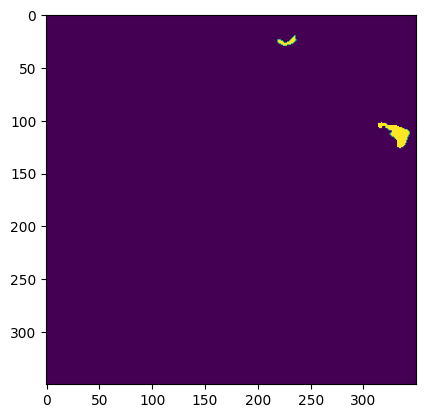

saved in disk
1.3M	subm2_t139F_199F_188F3_171F_15t1024b1F_222F_224F_227F_15tGC15F_SKf32_TH043_ALT0.zip


In [32]:
# 0.7247
preds=(preds4.astype('float32')+preds6.astype('float32')+preds7.astype('float32')+
       preds8.astype('float32')+1.5*preds12.astype('float32')+
       preds13.astype('float32')+preds15.astype('float32')+preds17.astype('float32')+1.5*preds24.astype('float32') #convnext
       )/10.
preds = np.array([skimage.transform.resize(x, (350,350)) for x in preds])
# preds=cubic_resize_all(preds, 350)
# print(preds.shape)
# plt.imshow(preds[0]>0.5)
# plt.show()

THRESH=0.43
preds = np.array([(x>THRESH).astype('uint8') for x in preds])

#POST PROCESS - remove masks in altitude>0
# preds= preds*(testALT<1).astype('uint8')
preds= preds*(testALT0<0.5).astype('uint8')
plt.imshow(preds[0]>THRESH)
plt.show()

[cv2.imwrite(test_predmask_path+test_image_names[i].split('_')[0]+'_kelp.tif', preds[i])
 for i in range(len(preds))]
print('saved in disk')

!cd test_kelp && zip -rq ../submissions/subm2_t139F_199F_188F3_171F_15t1024b1F_222F_224F_227F_15tGC15F_SKf32_TH043_ALT0.zip *
!du -h ../submissions/subm2_t139F_199F_188F3_171F_15t1024b1F_222F_224F_227F_15tGC15F_SKf32_TH043_ALT0.zip


In [33]:
# # 0.7247
# preds=(preds4.astype('float32')+preds6.astype('float32')+preds7.astype('float32')+
#        preds8.astype('float32')+preds12.astype('float32')+
#        preds13.astype('float32')+preds15.astype('float32')+preds17.astype('float32')+preds24.astype('float32') #convnext
#        )/9.
# preds = np.array([skimage.transform.resize(x, (350,350)) for x in preds])
# # preds=cubic_resize_all(preds, 350)
# # print(preds.shape)
# # plt.imshow(preds[0]>0.5)
# # plt.show()

# THRESH=0.43
# preds = np.array([(x>THRESH).astype('uint8') for x in preds])

# #POST PROCESS - remove masks in altitude>0
# # preds= preds*(testALT<1).astype('uint8')
# preds= preds*(testALT0<0.5).astype('uint8')
# plt.imshow(preds[0]>THRESH)
# plt.show()

# [cv2.imwrite(test_predmask_path+test_image_names[i].split('_')[0]+'_kelp.tif', preds[i])
#  for i in range(len(preds))]
# print('saved in disk')

# !cd test_kelp && zip -rq ../submissions/subm2_t139F_199F_188F3_171F_1024b1F_222F_224F_227F_GC15F_SKf32_TH043_ALT0.zip *
# !du -h ./submissions/subm2_t139F_199F_188F3_171F_1024b1F_222F_224F_227F_GC15F_SKf32_TH043_ALT0.zip


In [34]:
# # 0.7239
# preds=(preds3.astype('float32')+1.*preds4.astype('float32')+preds6.astype('float32')+preds7.astype('float32')+
#        preds8.astype('float32')+preds12.astype('float32')+1.5*preds13.astype('float32')+preds15.astype('float32'))/8.5
# preds = np.array([skimage.transform.resize(x, (350,350)) for x in preds])
# # preds=cubic_resize_all(preds, 350)
# # print(preds.shape)
# # plt.imshow(preds[0]>0.5)
# # plt.show()

# THRESH=0.45
# preds = np.array([(x>THRESH).astype('uint8') for x in preds])

# #POST PROCESS - remove masks in altitude>0
# preds= preds*(testALT<1).astype('uint8')
# plt.imshow(preds[0]>THRESH)
# plt.show()

# [cv2.imwrite(test_predmask_path+test_image_names[i].split('_')[0]+'_kelp.tif', preds[i])
#  for i in range(len(preds))]
# print('saved in disk')

# !cd test_kelp && zip -rq ../submissions/subm2_KKupnF_t139F_199F_188F3_171F_1024b1F_222Ft15_224F_SKf32_TH045_ALT.zip *
# !du -h ../submissions/subm2_KKupnF_t139F_199F_188F3_171F_1024b1F_222Ft15_224F_SKf32_TH045_ALT.zip
